Exploratory Data Analysis 

 For job seekers: Use these insights to help individuals about the best job opportunities for them

In [14]:
#import libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#import data
df = pd.read_csv("data_jobs.csv")



#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#Convert Job Skills from String to List
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

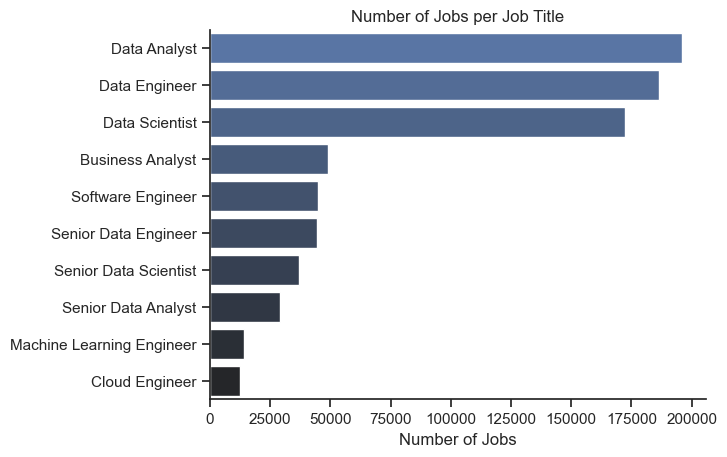

In [15]:
df_plot = df ['job_title_short'].value_counts().head(10).to_frame()
df_plot = df_plot.reset_index()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', palette='dark:b_r')
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()



Filter for PH Data Analyst Roles


In [16]:
df_da_ph = df[(df['job_country'] == 'Philippines') & (df['job_title_short'] == 'Data Analyst')].copy()

In [17]:
df_da_ph['job_location'].value_counts().head(10)

job_location
Philippines                               734
Taguig, Metro Manila, Philippines         729
Manila, Metro Manila, Philippines         712
Makati, Metro Manila, Philippines         652
Anywhere                                  601
Quezon City, Metro Manila, Philippines    299
Pasig, Metro Manila, Philippines          260
Cebu City, Cebu, Philippines              126
Mandaluyong, Metro Manila, Philippines    124
Muntinlupa, Metro Manila, Philippines      68
Name: count, dtype: int64

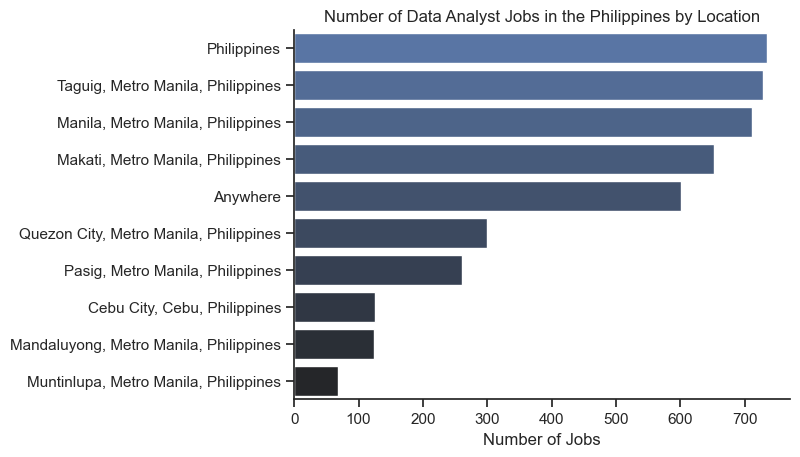

In [18]:
df_plot = df_da_ph ['job_location'].value_counts().head(10).to_frame()
df_plot = df_plot.reset_index()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', palette='dark:b_r')
sns.despine()
plt.title('Number of Data Analyst Jobs in the Philippines by Location')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()



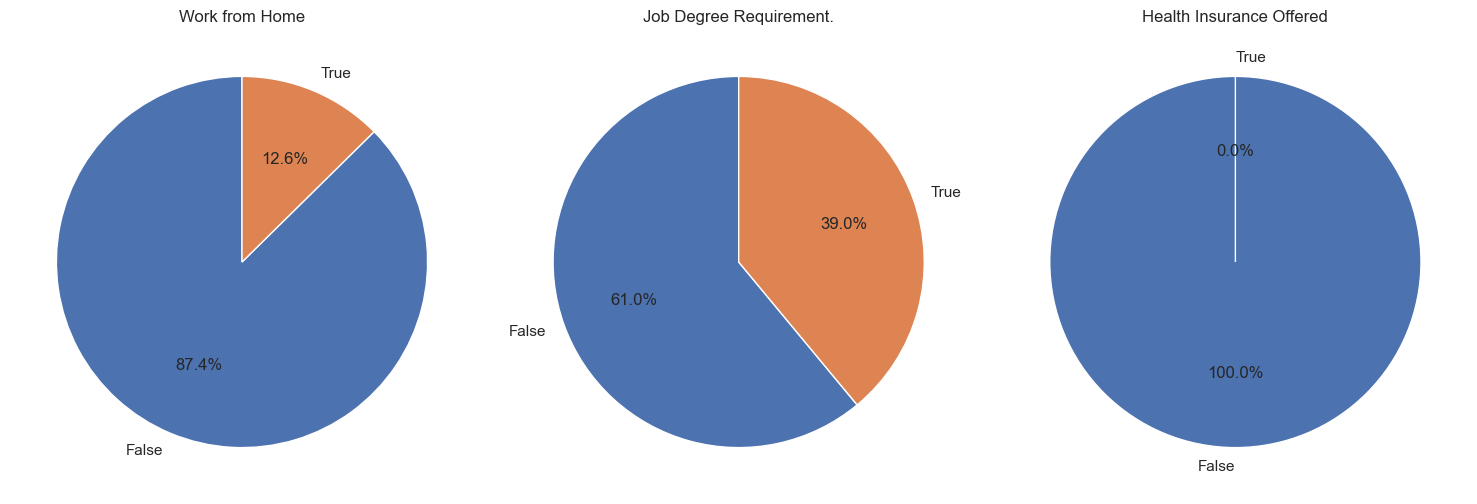

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Requirement.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    counts = df_da_ph[column].value_counts().reindex([False, True], fill_value=0)
    ax[i].pie(counts, startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.tight_layout()
plt.show()



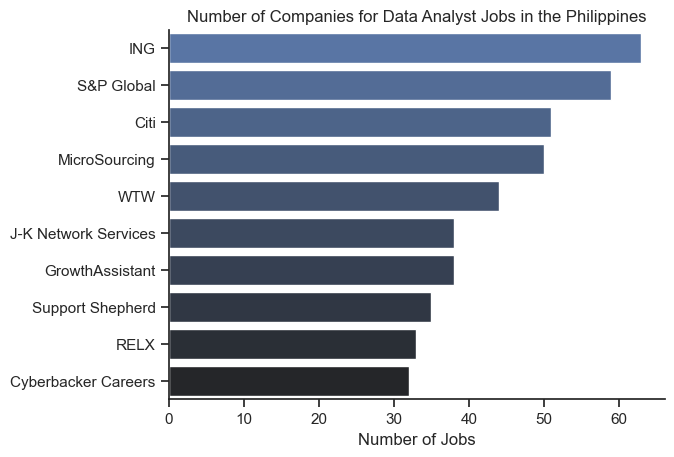

In [20]:
df_plot = df_da_ph ['company_name'].value_counts().head(10).to_frame()
df_plot = df_plot.reset_index()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', palette='dark:b_r')
sns.despine()
plt.title('Number of Companies for Data Analyst Jobs in the Philippines')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

